### Predicting Daily Temperature Maximum

In [1]:
import pandas as pd

# Imports and dataset
# Load the dataset
df = pd.read_csv('POWER_Point_Hourly_20221101_20241119_040d78N_073d97W_LST.csv')
print(df.head())

   YEAR  MO  DY  HR    T2M  PRECTOTCORR  QV2M      PS  WS2M    WD2M  ...  \
0  2022  11   1   0  14.26         0.28  9.89  100.67  1.20  199.73  ...   
1  2022  11   1   1  14.26         0.24  9.95  100.69  1.11  204.58  ...   
2  2022  11   1   2  14.19         0.30  9.89  100.70  1.01  212.71  ...   
3  2022  11   1   3  14.17         0.33  9.89  100.69  0.99  215.07  ...   
4  2022  11   1   4  14.07         0.26  9.83  100.69  1.01  213.32  ...   

    WD10M   RH2M  T2MWET  T2MDEW  ALLSKY_SFC_UV_INDEX  ALLSKY_SFC_SW_DWN  \
0  196.72  98.00   14.11   13.97                  0.0                0.0   
1  201.80  98.19   14.13   14.01                  0.0                0.0   
2  212.21  98.50   14.08   13.97                  0.0                0.0   
3  215.08  98.31   14.05   13.93                  0.0                0.0   
4  211.55  98.38   13.95   13.83                  0.0                0.0   

   CLRSKY_SFC_SW_DWN  ALLSKY_SFC_SW_DNI  ALLSKY_SFC_SW_DIFF  TOA_SW_DWN  
0           

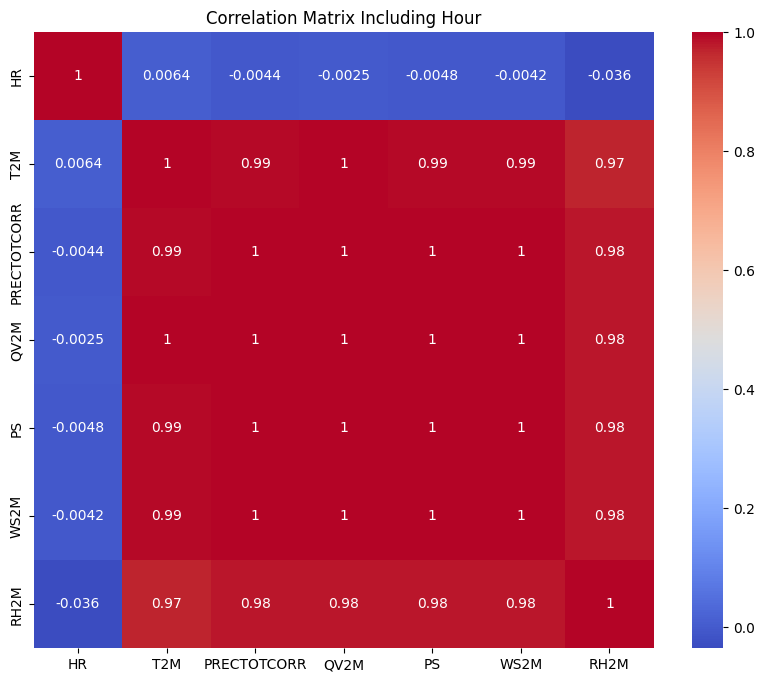

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Visualizing correlations between some variables including hour
plt.figure(figsize=(10, 8))
correlation_matrix = df[['HR', 'T2M', 'PRECTOTCORR', 'QV2M', 'PS', 'WS2M', 'RH2M']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Including Hour')
plt.show()


These features all look correlated.